In [2]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
EPOCH = 1
BATCH_SIZE = 64
TIME_SETP = 28
INPUT_SIZE = 28
LR = 0.01
DOWNLOAD_MNIST = False

In [4]:
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


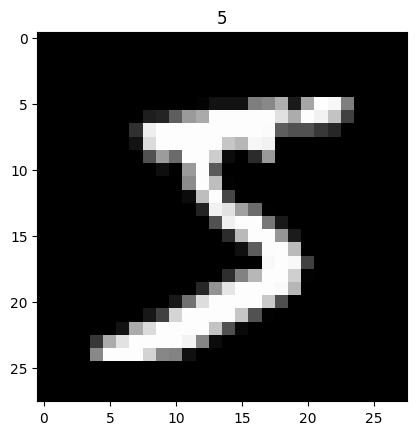

In [5]:
print(train_data.data.size())
print(train_data.targets.size())
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.data.type(torch.FloatTensor)[:2000] / 255.
test_y = test_data.targets.numpy()[:2000]

In [7]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64, 10)
        
    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)
        out = self.out(r_out[:, -1, :])
        return out

In [8]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [10]:
for epoch in range(EPOCH):
    for setp, (b_x, b_y) in enumerate(train_loader):
        b_x = b_x.view(-1, 28, 28)
        
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if setp % 50 == 0:
            test_output = rnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3071 | test accuracy: 0.14
Epoch:  0 | train loss: 1.2419 | test accuracy: 0.51
Epoch:  0 | train loss: 0.5840 | test accuracy: 0.69
Epoch:  0 | train loss: 0.4957 | test accuracy: 0.78
Epoch:  0 | train loss: 0.4489 | test accuracy: 0.79
Epoch:  0 | train loss: 0.5171 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3365 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1961 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1719 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1143 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2704 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1333 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1441 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2994 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2086 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2033 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2139 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1319 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1028 | test accuracy

In [11]:
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
